In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [117]:
file = pd.read_csv('C:/Users/jycha/Downloads/501.csv')

In [118]:
file

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6
...,...,...,...,...,...,...,...,...
103855,17:06.0,-0.760010,-0.068848,-0.203125,-0.796875,-0.007812,-0.036865,6
103856,17:06.0,-0.736328,-0.068115,-0.203125,-0.769287,0.037354,-0.056641,6
103857,17:06.0,-0.736328,-0.079834,-0.203125,-0.763672,0.052490,-0.027588,6
103858,17:06.0,-0.762207,-0.078125,-0.205078,-0.763428,0.042236,0.022705,6


In [119]:
file.isna().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [120]:
file.columns

Index(['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y',
       'thigh_z', 'label'],
      dtype='object')

In [121]:
sample_file = file.sample(frac=0.1)

In [122]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
sample_file['label']=le.fit_transform(sample_file['label'])
sample_file.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
27444,51:32.2,-0.968750,-0.031250,0.217285,0.030029,-0.062500,-1.093750,5
90514,12:36.2,-0.802979,0.054443,-0.220703,-0.858398,-0.075928,0.031250,0
69348,05:32.9,-0.920654,0.000244,-0.312744,-0.968018,-0.061035,-0.232178,0
35950,54:25.0,-1.363770,-0.336670,-0.380371,-1.436035,-0.283691,-0.276855,0
27970,51:42.8,-0.953125,-0.031250,0.234375,0.031250,-0.061523,-1.093750,5


Text(0.5, 1.0, 'Label')

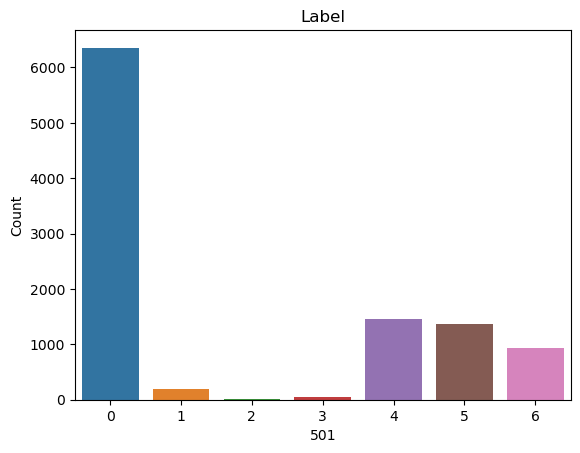

In [123]:
sns.countplot(data = sample_file, x="label")
plt.xlabel("501")
plt.ylabel("Count")
plt.title("Label")

In [124]:
sample_file = sample_file.drop('timestamp', axis=1)
sample_file.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
27444,-0.968750,-0.031250,0.217285,0.030029,-0.062500,-1.093750,5
90514,-0.802979,0.054443,-0.220703,-0.858398,-0.075928,0.031250,0
69348,-0.920654,0.000244,-0.312744,-0.968018,-0.061035,-0.232178,0
35950,-1.363770,-0.336670,-0.380371,-1.436035,-0.283691,-0.276855,0
27970,-0.953125,-0.031250,0.234375,0.031250,-0.061523,-1.093750,5


In [127]:
#Splitting the data into training and test test
X = sample_file.iloc[:,0:6].values
y = sample_file.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [128]:
X

array([[-9.687500e-01, -3.125000e-02,  2.172850e-01,  3.002900e-02,
        -6.250000e-02, -1.093750e+00],
       [-8.029790e-01,  5.444300e-02, -2.207030e-01, -8.583980e-01,
        -7.592800e-02,  3.125000e-02],
       [-9.206540e-01,  2.440000e-04, -3.127440e-01, -9.680180e-01,
        -6.103500e-02, -2.321780e-01],
       ...,
       [-1.562500e-01, -2.075200e-02,  9.062500e-01, -1.228030e-01,
        -1.628420e-01, -1.076416e+00],
       [-8.906250e-01, -3.125000e-02,  3.903810e-01, -9.531250e-01,
        -1.489300e-02,  7.812500e-02],
       [-9.975590e-01, -4.370100e-02,  1.223140e-01, -9.743650e-01,
        -6.347700e-02, -1.025390e-01]])

In [129]:
Y

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [132]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(6,),activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                448       
                                                                 
 dense_49 (Dense)            (None, 48)                3120      
                                                                 
 dense_50 (Dense)            (None, 32)                1568      
                                                                 
 dense_51 (Dense)            (None, 7)                 231       
                                                                 
Total params: 5,367
Trainable params: 5,367
Non-trainable params: 0
_________________________________________________________________


In [133]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
260/260 [==============================] - 3s 6ms/step - loss: 0.3237 - accuracy: 0.9074 - val_loss: 0.2340 - val_accuracy: 0.9336
Epoch 2/100
260/260 [==============================] - 1s 5ms/step - loss: 0.2181 - accuracy: 0.9395 - val_loss: 0.2127 - val_accuracy: 0.9423
Epoch 3/100
260/260 [==============================] - 2s 6ms/step - loss: 0.2640 - accuracy: 0.9354 - val_loss: 0.2175 - val_accuracy: 0.9413
Epoch 4/100
260/260 [==============================] - 2s 6ms/step - loss: 0.2052 - accuracy: 0.9422 - val_loss: 0.2118 - val_accuracy: 0.9485
Epoch 5/100
260/260 [==============================] - 1s 6ms/step - loss: 0.2109 - accuracy: 0.9446 - val_loss: 0.2430 - val_accuracy: 0.9447
Epoch 6/100
260/260 [==============================] - 1s 5ms/step - loss: 0.1906 - accuracy: 0.9484 - val_loss: 0.1955 - val_accuracy: 0.9471
Epoch 7/100
260/260 [==============================] - 1s 5ms/step - loss: 0.2007 - accuracy: 0.9431 - val_loss: 0.1895 - val_accuracy: 0.9500

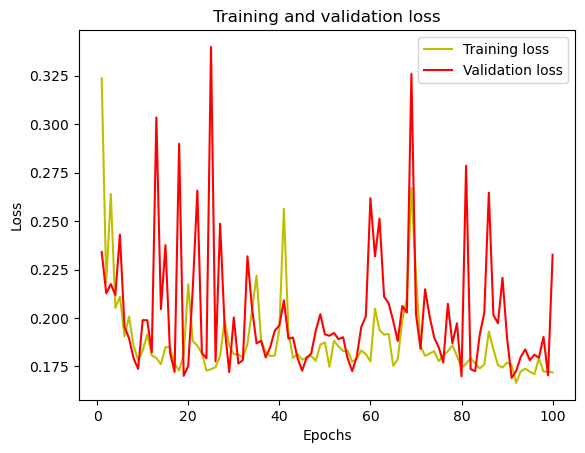

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

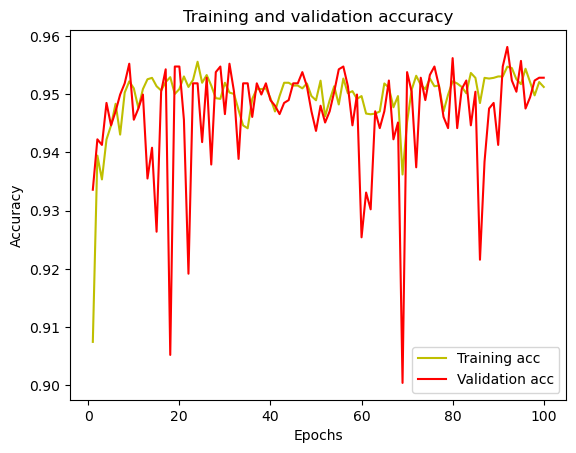

In [135]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [136]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1274
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        12
           4       0.90      0.95      0.92       293
           5       0.98      1.00      0.99       275
           6       1.00      1.00      1.00       181

    accuracy                           0.95      2078
   macro avg       0.55      0.56      0.55      2078
weighted avg       0.93      0.95      0.94      2078

[[1245    0    0    0   23    6    0]
 [  32    0    0    0    9    0    0]
 [   2    0    0    0    0    0    0]
 [  12    0    0    0    0    0    0]
 [  14    0    0    0  279    0    0]
 [   0    0    0    0    0  275    0]
 [   0    0    0    0    0    0  181]]
